In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/archive/train.csv")
test_data = pd.read_csv('/content/drive/MyDrive/archive/test.csv')
test_data = test_data.drop(['id'], axis = 1)
print(list(train_data.columns))
train_data.head()

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
std = StandardScaler()
y = train_data['price_range']
X = train_data.drop(['price_range'], axis = 1)
X = std.fit_transform(X)

Support vector
89.0


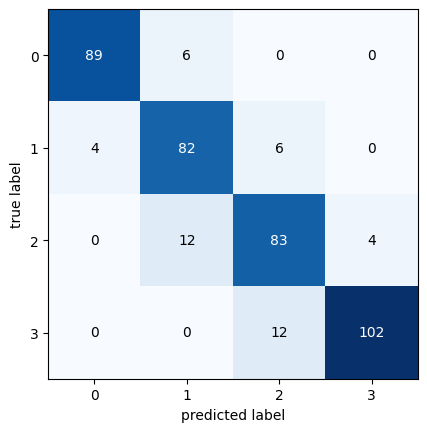



Logistic regression
95.5


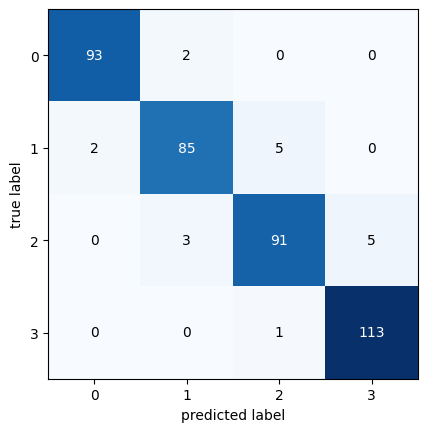



Random Forest
81.75


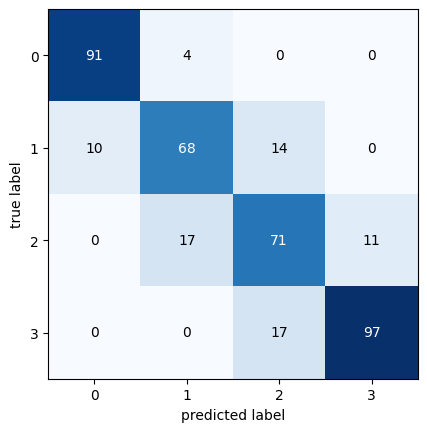



Decision Trees
84.0


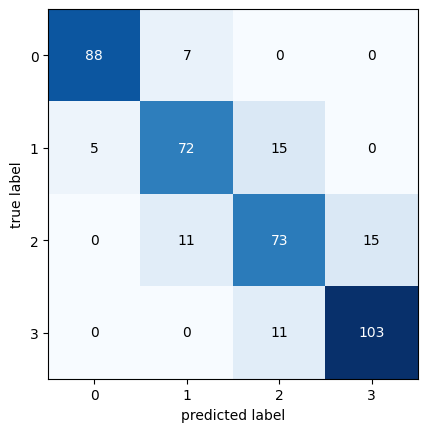



KNeighbourClassifier
51.5


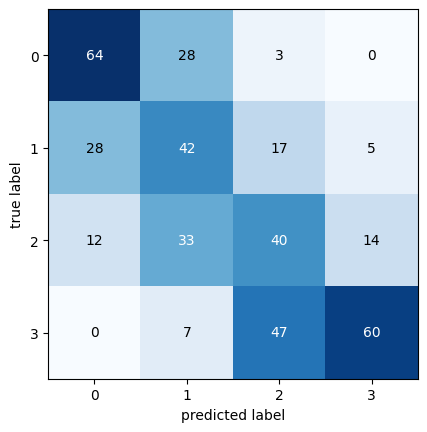



XGBoost
91.5


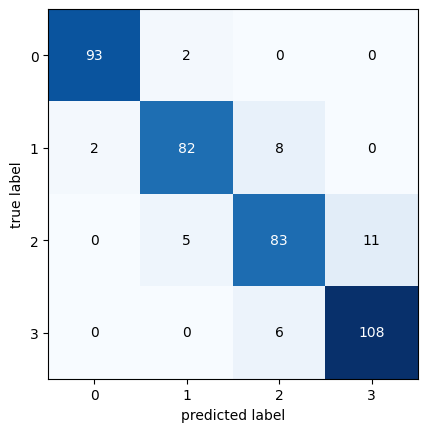



Adaboost
69.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


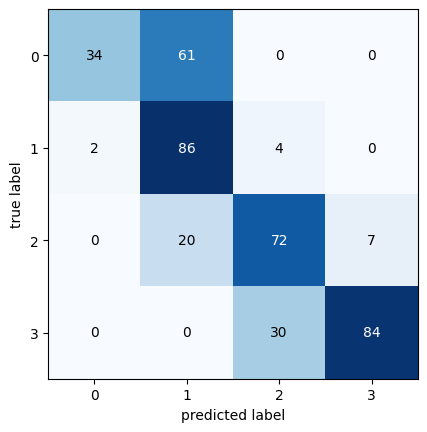



Gradient Boosting
87.75


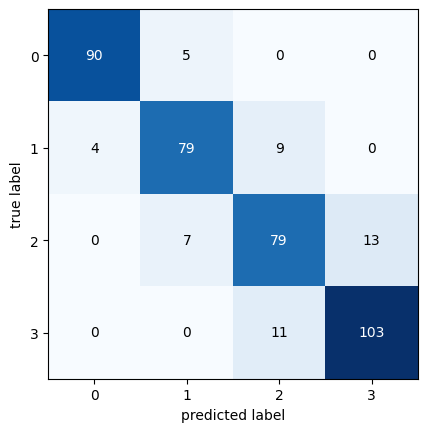



Gaussian Process
72.5


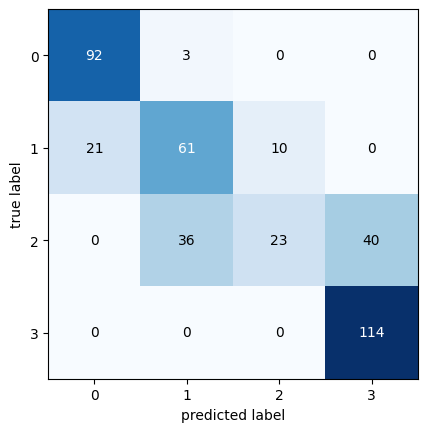

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
models = [[SVC(), "Support vector"],
        [LogisticRegression(), "Logistic regression"],
         [RandomForestClassifier(n_estimators = 10), "Random Forest"],
         [DecisionTreeClassifier(max_depth = 7), "Decision Trees"],
         [KNeighborsClassifier(n_neighbors = 7), "KNeighbourClassifier"],
         [xgb.XGBClassifier(objective="binary:logistic", random_state=42), "XGBoost"],
         [AdaBoostClassifier(n_estimators = 25), "Adaboost"],
         [GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=0), "Gradient Boosting"],
         [GaussianProcessClassifier(kernel=RBF(1.0),random_state=0), 'Gaussian Process']]
for i in models:
    name = i[1]
    model = i[0]
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred) * 100)
    cnf = confusion_matrix(y_test,y_pred)
    fig, ax = plot_confusion_matrix(conf_mat = cnf)
    plt.show()
    print("\n")

In [ ]:
hyperparameters = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
model = LogisticRegression()
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

{'C': 100, 'penalty': 'l2'}
0.9712500000000001
0.9675
